In [89]:
import pandas as pd
import os
from pgtools.maf_parser import parse_maf, MAF
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [6]:
csv_dir = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
csv_name = "scaf_lens.csv"

In [3]:
for dataset in os.listdir(csv_dir):
    print(dataset)
    for f in os.listdir(os.path.join(csv_dir, dataset)):
        print(f)

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
scaf_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
scaf_lens.csv
klebsiella_subset
scaf_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
scaf_lens.csv
GPSC_subset
scaf_lens.csv


In [26]:
all_lens = {}
for dataset in os.listdir(csv_dir):
    print(dataset)
    for f in os.listdir(os.path.join(csv_dir, dataset)):
        df = pd.read_csv(os.path.join(csv_dir, dataset, f))
        lens = df["Len"].to_numpy()
        all_lens[datasets_mapping(dataset)] = lens

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
klebsiella_subset
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
GPSC_subset


In [7]:
def datasets_mapping(x):
    if x.startswith("sim"):
        x= x.replace("sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1", "E. coli ")
    else:
        x= x.replace("_subset", "")
        x= x.replace("GPSC", "Pneumococcus")
        x = x.replace("klebsiella", "Klebsiella")
    return x.strip().replace("_","")

In [8]:
dataset = "klebsiella_subset"

In [9]:
df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))

In [10]:
df

,Contig,Len
0,5235_5_12.contig00001,64326
1,5235_5_12.contig00002,60612
2,5235_5_12.contig00003,53131
3,5235_5_12.contig00004,42928
4,5235_5_12.contig00005,40521
...,...,...
15603,5235_6_6.contig01171,56
15604,5235_6_6.contig01172,56
15605,5235_6_6.contig01173,56
15606,5235_6_6.contig01174,56


In [11]:
lens = df["Len"].to_numpy()

In [13]:
lens

array([64326, 60612, 53131, ...,    56,    56,    56])

In [14]:
max(lens)

520083

In [15]:
from collections import Counter

In [16]:
len_coutns = dict(Counter(lens))

In [17]:
len_coutns

{64326: 1,
 60612: 1,
 53131: 1,
 42928: 1,
 40521: 1,
 40109: 1,
 36923: 1,
 36600: 1,
 36365: 1,
 35201: 1,
 33934: 1,
 33337: 1,
 32855: 1,
 32199: 1,
 31282: 1,
 30241: 1,
 29843: 1,
 29837: 1,
 29361: 1,
 29277: 1,
 29044: 1,
 29029: 1,
 28749: 1,
 28569: 1,
 28070: 1,
 27720: 2,
 27475: 1,
 27334: 1,
 26878: 1,
 26800: 1,
 26180: 1,
 25981: 1,
 25936: 1,
 25861: 1,
 25728: 1,
 25560: 1,
 24837: 1,
 24745: 1,
 24630: 1,
 24407: 1,
 23843: 1,
 23483: 1,
 23383: 1,
 23309: 1,
 23298: 1,
 23036: 1,
 23014: 2,
 22992: 1,
 22778: 1,
 22270: 1,
 22038: 1,
 21540: 1,
 21362: 1,
 21266: 1,
 20991: 2,
 20926: 1,
 20875: 1,
 20831: 1,
 20094: 1,
 20029: 1,
 19988: 1,
 19909: 1,
 19831: 1,
 19771: 1,
 19491: 1,
 19465: 2,
 19182: 1,
 19005: 2,
 18839: 1,
 18761: 1,
 18618: 2,
 18571: 1,
 18516: 1,
 18495: 1,
 18337: 1,
 18310: 1,
 18033: 1,
 17852: 1,
 17797: 1,
 17502: 1,
 17430: 1,
 17410: 1,
 17195: 1,
 17189: 1,
 17047: 1,
 16879: 1,
 16781: 1,
 16645: 1,
 16614: 2,
 16357: 1,
 16294: 1,

<Axes: ylabel='Count'>

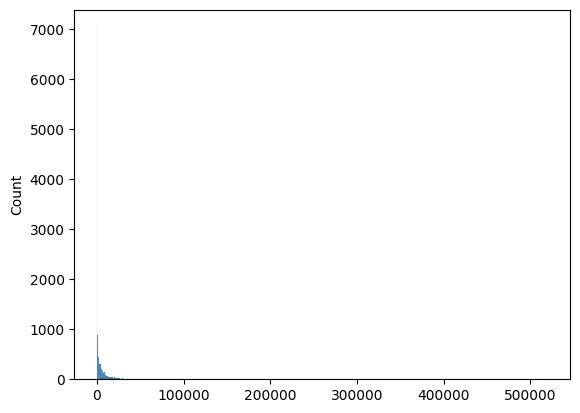

In [12]:

sns.histplot(lens)


In [29]:
datasets = sorted(list(all_lens.keys()))

In [30]:
datasets

['E. coli',
 'E. coli contaminated',
 'E. coli fragmented',
 'Klebsiella',
 'Pneumococcus']

In [27]:
all_lens

{'E. coli fragmented': array([68136, 67305, 61789, ...,    79,    78,    78]),
 'E. coli contaminated': array([250972, 218323, 154585, ...,     79,     78,     78]),
 'Klebsiella': array([64326, 60612, 53131, ...,    56,    56,    56]),
 'E. coli': array([250943, 246775, 220002, ...,     57,     56,     56]),
 'Pneumococcus': array([393383, 313001, 200830, ...,    378,    373,    306])}

In [39]:
lens = []
for i in all_lens.values():
    lens += list(i)
max(lens)

520083

In [66]:
datasets

['E. coli',
 'E. coli contaminated',
 'E. coli fragmented',
 'Klebsiella',
 'Pneumococcus']

In [82]:
datasets=['E. coli',
 'Pneumococcus',
 'E. coli fragmented',
 'Klebsiella',
 'E. coli contaminated',
]

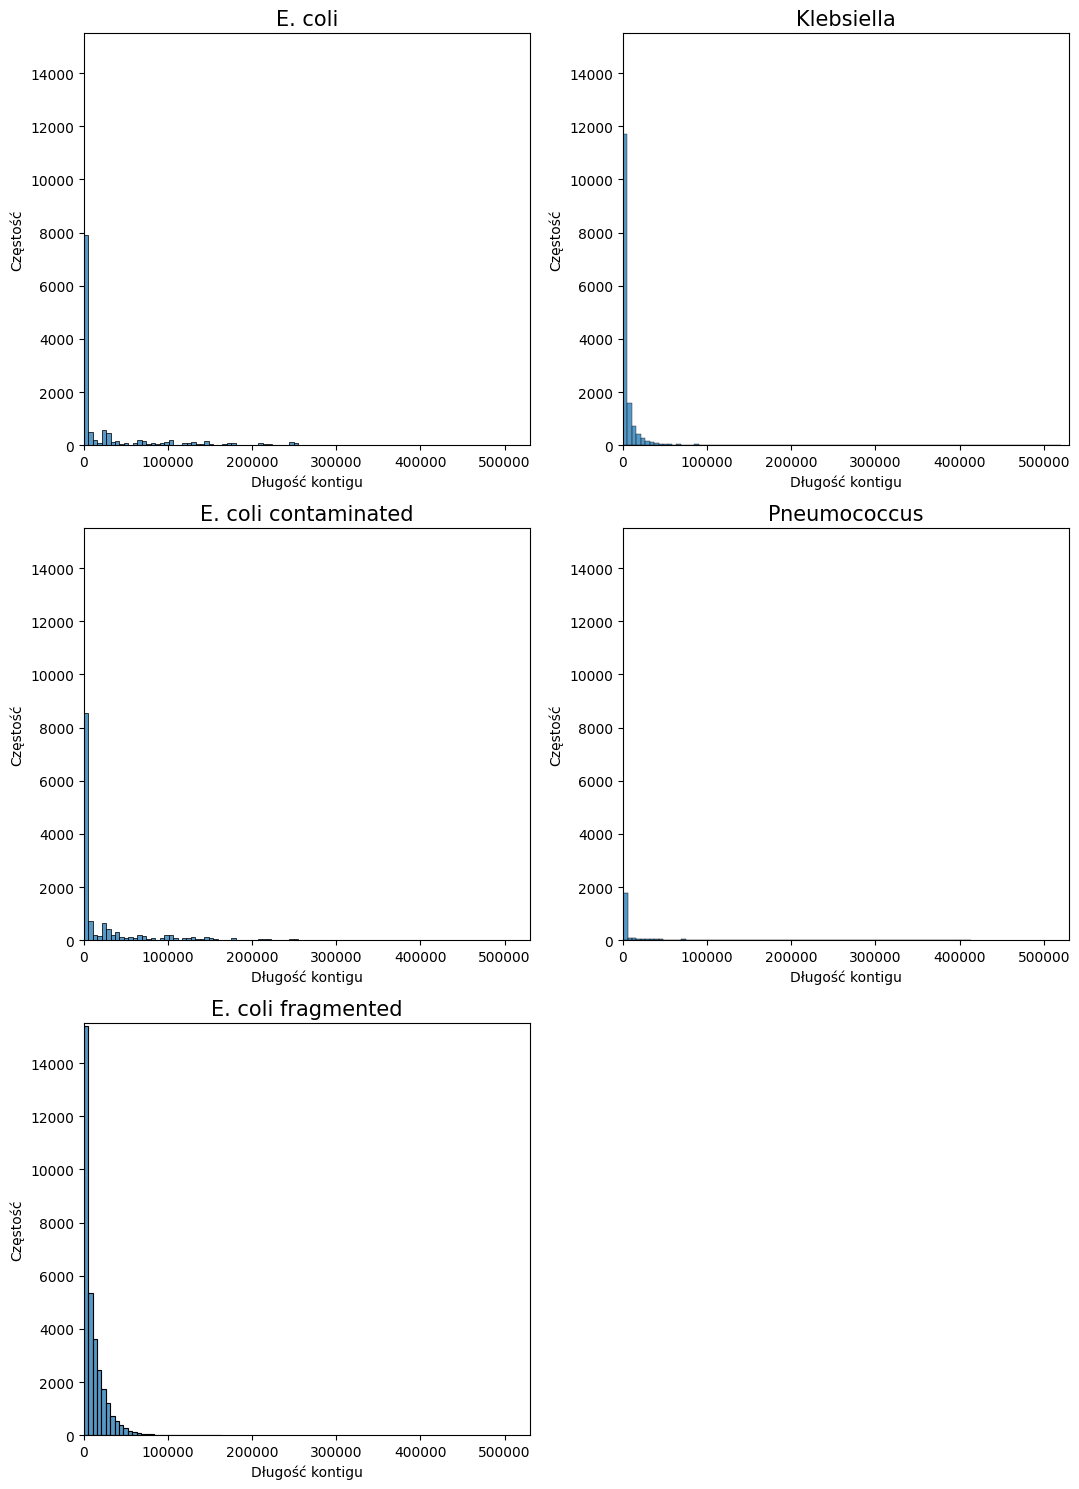

In [87]:
fig, axes = plt.subplots(3,2,figsize=(11, 15))
# fig.s
for k in range(5):
    dataset = datasets[k]
    i = k % 2
    j = k % 3
    sns.histplot(all_lens[dataset], ax=axes[j, i], bins=50, binwidth = 530000*0.01)
    axes[j, i].set_title(dataset, fontsize=15)
    axes[j, i].set_xlabel("Długość kontigu", fontsize=10)
    axes[j, i].set_ylabel("Częstość", fontsize=10)
    axes[j, i].set(xlim=(0,530000))
    axes[j, i].set(ylim=(0,15500))

# plt.show()
fig.tight_layout()

axes[2, 1].axis("off")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/scaff_lens_dists.png")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/scaff_lens_dists.svg")

In [93]:
round(9543, -2)

9500

In [98]:
all_lens_rounded = {dataset: [round(i, -1) for i in lens] for dataset, lens in all_lens.items()}

In [100]:
for dataset, lens in all_lens_rounded.items():
    print(dataset)
    print(max(lens))
    print(min(lens))
    print(np.median(lens))
    print(np.mean(lens))

    print("-"*40)

E. coli fragmented
162700
80
5930.0
10762.353506541824
----------------------------------------
E. coli contaminated
254860
80
800.0
25389.565597031215
----------------------------------------
Klebsiella
520080
60
840.0
7520.442721681189
----------------------------------------
E. coli
255100
60
670.0
28143.58271865121
----------------------------------------
Pneumococcus
413790
290
480.0
18426.51284109149
----------------------------------------


In [111]:
print("Średnie długości contigów wchodzących w skład genomów poszczególnych datasetów:")
columns = ["Dataset", "Liczba wszystkich kontigów", ""]
for dataset in sorted(list(all_lens.keys())):
    lens = all_lens[dataset]
    print(f"{dataset}: liczba wszystkich scaffoldów: {len(lens)}, średnia długość {np.mean(lens):.0f}")
    # print(max(lens))
    # print(min(lens))
    # print(np.median(lens))
    # print(np.mean(lens))

    # print("-"*40)

Średnie długości contigów wchodzących w skład genomów poszczególnych datasetów:
E. coli: liczba wszystkich scaffoldów: 12337, średnia długość 28144
E. coli contaminated: liczba wszystkich scaffoldów: 13743, średnia długość 25389
E. coli fragmented: liczba wszystkich scaffoldów: 32254, średnia długość 10762
Klebsiella: liczba wszystkich scaffoldów: 15608, średnia długość 7520
Pneumococcus: liczba wszystkich scaffoldów: 2492, średnia długość 18427


In [117]:
dataset="klebsiella_subset"
df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))
df["Genome"] = df["Contig"].apply(lambda x: x.split(".")[0])

In [126]:
df.groupby(by=["Genome"])["Len"].mean().mean().astype("int")

11384

In [127]:
df.groupby(by=["Genome"])["Len"].count().mean().astype("int")

780

In [136]:
cols = ["Dataset", "Średnia liczba kontigów w genomie", "Średnia średniej długości kontigu w genomie", "Średnia długość wszystkich kontigów w datasecie"]
data = []
for dataset in os.listdir(csv_dir):
    if "." in dataset:
        continue
    df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))
    df["Genome"] = df["Contig"].apply(lambda x: x.split(".")[0])
    data.append([datasets_mapping(dataset), df.groupby(by=["Genome"])["Len"].count().mean().astype("int"), df.groupby(by=["Genome"])["Len"].mean().mean().astype("int"), df["Len"].mean().astype("int")])

In [137]:
data

[['E. coli fragmented', 322, 10769, 10762],
 ['E. coli contaminated', 137, 25449, 25389],
 ['Klebsiella', 780, 11384, 7520],
 ['E. coli', 123, 28250, 28143],
 ['Pneumococcus', 124, 36545, 18426]]

In [141]:
df_basic = pd.DataFrame(columns=cols, data=data)
df_basic = df_basic.sort_values(["Dataset"])

In [139]:
df_basic

,Dataset,Średnia liczba kontigów w genomie,Średnia średniej długości kontigu w genomie,Średnia długość wszystkich kontigów w datasecie
0,E. coli fragmented,322,10769,10762
1,E. coli contaminated,137,25449,25389
2,Klebsiella,780,11384,7520
3,E. coli,123,28250,28143
4,Pneumococcus,124,36545,18426


In [142]:
df_basic.to_csv("/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/basic_dataset_stats.csv", index=False)